In [ ]:
import random
import librosa
import scipy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import IPython.display as ipd
import cv2
# import torch
# import torchaudio
# from torchaudio import transforms
%matplotlib inline

In [14]:
def plot_spectrogam(hop_length, file):
    D = librosa.amplitude_to_db (np.abs (librosa.stft (file, hop_length=hop_length)),
                                 ref=np.max)
    librosa.display.specshow (D, y_axis='log', sr=sr, hop_length=hop_length,
                              x_axis='time')
    plt.title ('Log-frequency power spectrogram')
    
def plot_fourier:
    plt.figure(10,8)
    plt.plot()

In [54]:
redhot = fr"C:\Users\LEGION\PycharmProjects\AudioDataAugmentation\redhot.wav"
redhot_file, sr = librosa.load(redhot, duration=5, mono=False, sr=44100)
print(len(redhot_file), redhot_file.shape, sr)

# hear file
ipd.Audio(redhot_file, rate=sr)

220500 (220500,) 44100


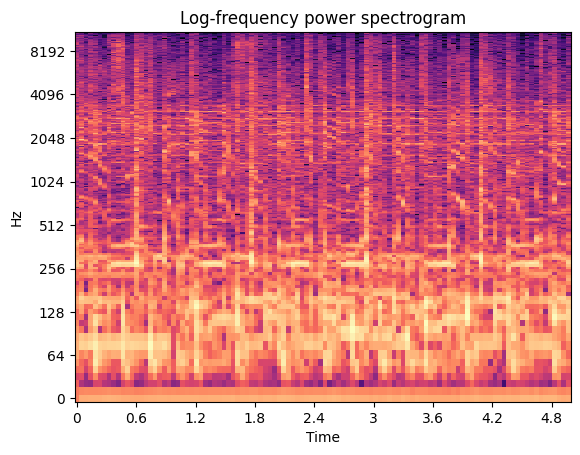

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
db = librosa.amplitude_to_db(np.abs(librosa.stft(redhot_file)), ref=np.max)
img = librosa.display.specshow(db, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
db2 = librosa.amplitude_to_db(np.abs(librosa.stft(redhot_file, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(db2, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")

time shift:  6306


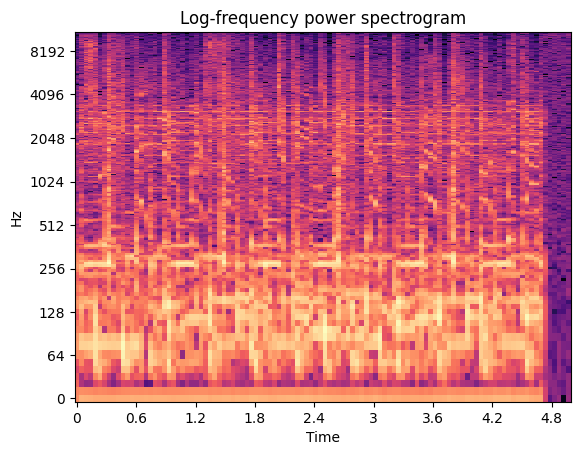

In [16]:
# time shift
start_ = int(np.random.uniform(-30000,30000))
print('time shift: ',start_)
if start_ >= 0:
    wav_time_shift = np.r_[redhot_file[start_:], np.random.uniform(-0.01,0.01, start_)]
else:
    wav_time_shift = np.r_[np.random.uniform(-0.01,0.01, -start_), redhot_file[:start_]]
ipd.Audio(wav_time_shift, rate=sr)

plot_spectrogam(hop_length=1024, file=wav_time_shift)

In [36]:
# changing the speed rate and the pitch

rng = np.random.default_rng()
speed_rate = rng.uniform(low=0.7, high=1.3)

wav_speed_tune = cv2.resize(redhot_file, (1, int(len(redhot_file) * speed_rate))).squeeze()
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < len(redhot_file):
    pad_len = len(redhot_file) - len(wav_speed_tune)
    wav_speed_tune = np.r_[rng.uniform(-0.001,0.001,int(pad_len/2)),wav_speed_tune,rng.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - len(redhot_file)
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+1223424]
print('wav length: ', wav_speed_tune.shape[0])
ipd.Audio(wav_speed_tune, rate=sr)

speed rate: 0.948 (lower is faster)
wav length:  110250


In [42]:
# changing length without changing pitch (time stretch)

time_stretch = librosa.effects.time_stretch(y=redhot_file, rate=0.8)
# plot_spectrogam(hop_length=hop_length, file=time_stretch)
ipd.Audio(time_stretch, rate=sr)

In [47]:
# frequency filters

f0 = 27.5
cents = range(0,11500,300) # Until 19KHz 300 cents = minor 3rd filters
fil_freq = np.round([f0*(pow((2**((1.0/1200))),i)) for i in cents])
# print(len(fil_freq))

# dB = 20 * np.log10(signal_fft_abs / np.max(signal_fft_abs))

In [63]:
fourier = librosa.stft(redhot_file)
fft_freqs = librosa.fft_frequencies(sr=sr, n_fft=1024)
print(fourier.shape, len(fft_freqs))
# 
# print(fft_freqs[-1])
# # print(fourier.shape)
# # plot_spectrogam(hop_length=hop_length, file=redhot_file)
# plt.plot(fourier[1])

(1025, 431) 513


C:\Users\LEGION\AppData\Local\Temp\ipykernel_5400\1008663287.py:50: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio), ref=np.max),
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5400\1008663287.py:56: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio_noisy), ref=np.max),


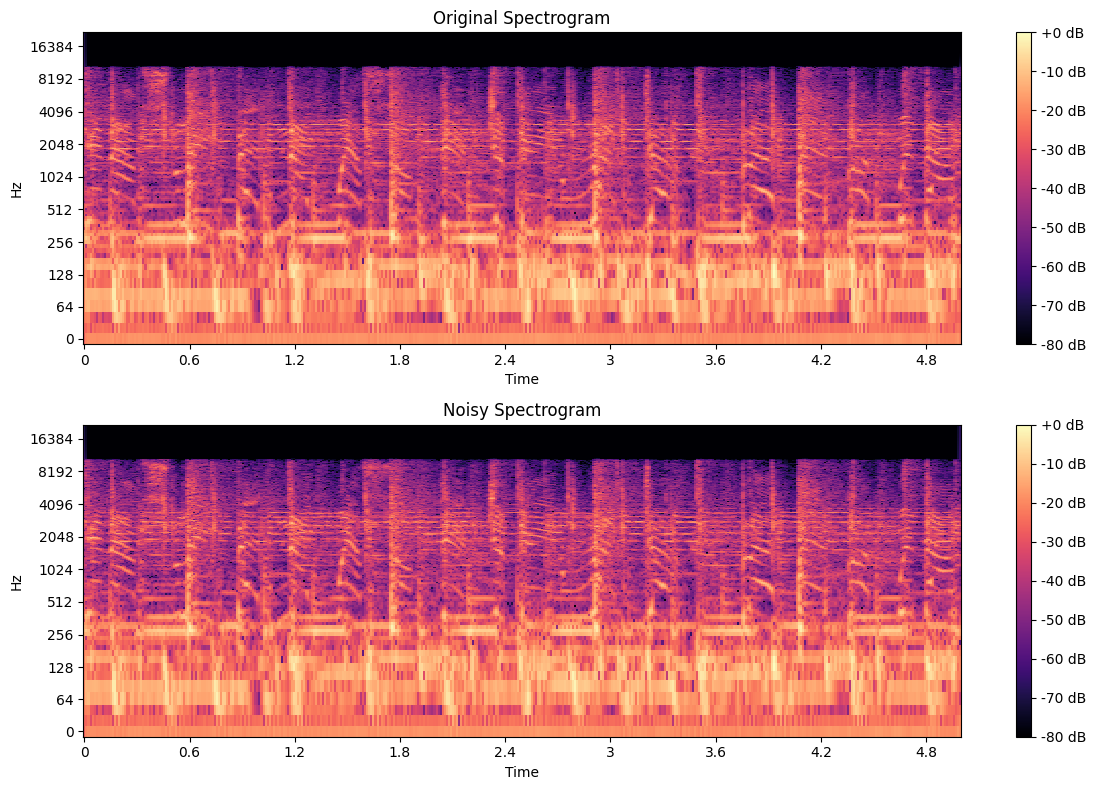

In [65]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt

def apply_noise_in_frequency_range(audio, sr, low_freq, high_freq, noise_level):
    # Perform Short-Time Fourier Transform (STFT)
    D = librosa.stft(audio)
    D_mag, D_phase = librosa.magphase(D)

    # Get the frequencies corresponding to each bin
    freqs = librosa.fft_frequencies(sr=sr)

    # Find the indices of the frequency bins that lie within the desired range
    freq_bins = np.where((freqs >= low_freq) & (freqs <= high_freq))[0]

    # Apply noise to the magnitude of the specified frequency bins
    noise = np.random.randn(*D_mag.shape) * noise_level
    D_mag[freq_bins, :] += noise[freq_bins, :]

    # Combine the modified magnitude with the original phase
    D_noisy = D_mag * D_phase

    # Perform the inverse STFT to convert back to the time domain
    audio_noisy = librosa.istft(D_noisy)

    return audio_noisy

# Load the audio file
# filename = 'path_to_your_audio_file.wav'
audio = redhot_file
sr = 44100

# Apply noise in the specified frequency range
low_freq = 500  # Lower bound of the frequency range in Hz
high_freq = 1500  # Upper bound of the frequency range in Hz
noise_level = 0.1  # Adjust the noise level as needed

audio_noisy = apply_noise_in_frequency_range(audio, sr, low_freq, high_freq, noise_level)

# Save the modified audio to a new file
output_filename = 'output_noisy.wav'
sf.write(output_filename, audio_noisy, sr)

# Optionally, plot the original and modified spectrograms for visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio), ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Original Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio_noisy), ref=np.max),
                         sr=sr, y_axis='log', x_axis='time')
plt.title('Noisy Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Optionally, play the modified audio (for Jupyter notebooks)
from IPython.display import Audio
Audio(data=audio_noisy, rate=sr)
